<a href="https://colab.research.google.com/github/yunpengliDataScience/Skin_Cancer_ML_DL/blob/main/Skin_Cancer_Analysis/Machine_Learning/SkinCancer_Classification_EDA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
from imageio import imread
from PIL import Image
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn import preprocessing

**Mout google drive:**




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


**Create project root path:**

In [ ]:
project_root_path_string = '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/'

print("project_root_path_string:", project_root_path_string)

project_root_path_string: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/


In [ ]:
sys.path.append(project_root_path_string)

sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/']

**Get the root data directory:**

In [ ]:
data_root_path = os.path.join(project_root_path_string, 'data') 

print("data_root_path:", data_root_path)

data_root_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data


**Get the raw image data directory:**

In [ ]:
raw_data_path =  os.path.join(data_root_path, 'raw_image_data') 
print("raw_data_path:", raw_data_path)

raw_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data


**Get the tabular data path:**

In [ ]:
tabular_data_path = os.path.join(data_root_path, 'tabular_data') 

print("tabular_data_path:", tabular_data_path)

tabular_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/tabular_data


**Read metadata into a panda data frame:**

In [ ]:
metaData_pd = pd.read_csv(os.path.join(tabular_data_path, 'metadata.csv'))

In [ ]:
metaData_pd.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


**Identify missing values:**

In [ ]:
count_nan_in_df = metaData_pd.isnull().sum()
print (count_nan_in_df)

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64


**Visualize skin leison category size:**

Text(0.5, 1.02, 'Number of image by cancer diagnosis type')

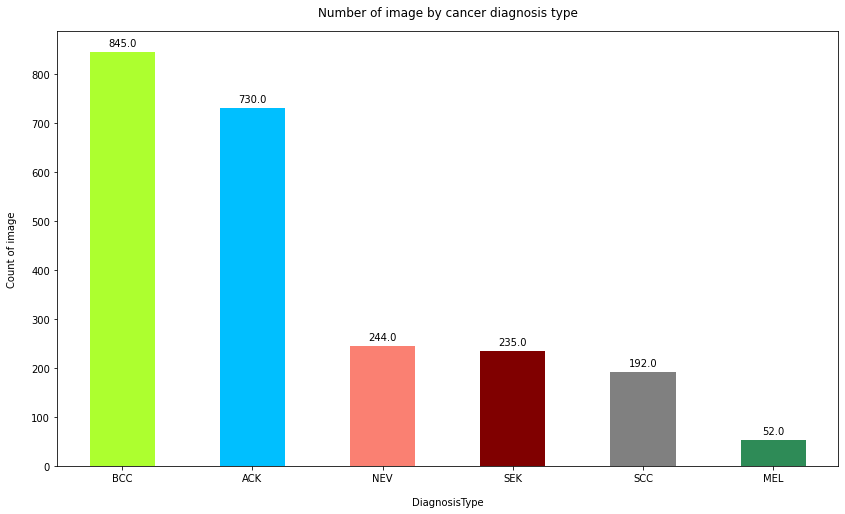

In [ ]:
colors = ['#ADFF2F','#00BFFF','#FA8072','#800000','#808080','#2E8B57']
plt.figure(figsize=(8, 6))
splot=metaData_pd['diagnostic'].value_counts().plot(kind='bar', figsize=(14, 8), rot=0, color=colors)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("DiagnosisType", labelpad=14)
plt.ylabel("Count of image", labelpad=14)

plt.title("Number of image by cancer diagnosis type", y=1.02)




In [ ]:
##The dataset contains 1342 images whith true biopsy
## 58.3% of the images have true biopse

(metaData_pd.groupby('biopsed').size()/metaData_pd['biopsed'].count())*100

biopsed
False    41.601393
True     58.398607
dtype: float64

In [ ]:
### remove the id columns as since it is not important to field to train a model
metaData_pd = metaData_pd.drop(columns=['patient_id','img_id','lesion_id'])

In [ ]:
metaData_pd['elevation'].value_counts()

True     1433
False     863
UNK         2
Name: elevation, dtype: int64

We identified there is value UNK for unknown values for variables:Background_Father,background_mother,Elevealtion,hurt,itch,grew,changed,bleed. Then we replace those values with nan and imputed with mode function.

In [ ]:
#Replacing 'UNK' with nan and imputing them
metaData_pd=metaData_pd.replace('UNK',np.nan,regex=True)

In [ ]:
metaData_pd['background_father'].value_counts()

POMERANIA      530
GERMANY        466
ITALY          250
BRAZIL          89
NETHERLANDS     19
PORTUGAL        15
POLAND           7
BRASIL           3
CZECH            3
SPAIN            1
AUSTRIA          1
ISRAEL           1
Name: background_father, dtype: int64

In [ ]:
#Replacing 'BRASIL' with 'BRAZIL'
metaData_pd['background_father'] = metaData_pd['background_father'].str.replace('BRASIL','BRAZIL')

# **Prepare data for Machine Learning**
Preprocessing and Data cleaning

**Identify categorical variables from the Tabular data**

In [ ]:
# categorical features check
cat =metaData_pd.select_dtypes(include='O').keys()
cat

Index(['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'region', 'diagnostic', 'itch', 'grew', 'hurt',
       'changed', 'bleed', 'elevation'],
      dtype='object')

# **Most frequent / mode Imputation**
**Replace the missing values for data categorical variable using the most frequent values.Using mode function.**
https://medium.com/geekculture/frequent-category-imputation-missing-data-imputation-technique-4d7e2b33daf7

In [ ]:

cat_columns = metaData_pd[['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'region', 'itch', 'grew', 'hurt',
       'changed', 'bleed', 'elevation','biopsed']]

In [ ]:

#imputing the null values in numerical columns with mean
for column in cat_columns.columns:
    cat_columns[column].fillna(cat_columns[column].mode()[0], inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
##verifying if UNK values got imputed
cat_columns['background_father'].value_counts()

POMERANIA      1443
GERMANY         466
ITALY           250
BRAZIL           92
NETHERLANDS      19
PORTUGAL         15
POLAND            7
CZECH             3
SPAIN             1
AUSTRIA           1
ISRAEL            1
Name: background_father, dtype: int64

**Identify numeric features and impute missing values with mean**

In [ ]:
metaData_le= cat_columns
##numeric features impute mean values for nan
#Taking care of Missing data
col=metaData_pd[['age','fitspatrick','diameter_1','diameter_2']]
from sklearn.impute import SimpleImputer  
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(col)
###merge the numeric fields to the categorical fields
metaData_le[['age','fitspatrick','diameter_1','diameter_2']]= imputer.transform(col)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
metaData_le=metaData_le.join(metaData_pd['diagnostic'])
metaData_le.head()

,smoke,drink,background_father,background_mother,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,region,itch,grew,hurt,changed,bleed,elevation,biopsed,age,fitspatrick,diameter_1,diameter_2,diagnostic
0,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,ARM,False,False,False,False,False,False,False,8.0,2.26573,11.897055,8.852209,NEV
1,False,False,POMERANIA,POMERANIA,False,FEMALE,True,True,True,True,NECK,True,True,False,True,True,True,True,55.0,3.00000,6.000000,5.000000,BCC
2,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,FACE,True,False,False,False,False,False,False,77.0,2.26573,11.897055,8.852209,ACK
3,False,False,POMERANIA,POMERANIA,False,FEMALE,False,True,True,True,HAND,True,False,False,False,False,False,False,75.0,2.26573,11.897055,8.852209,ACK
4,False,True,POMERANIA,POMERANIA,False,MALE,True,False,False,False,FOREARM,True,True,False,False,True,True,True,79.0,1.00000,5.000000,5.000000,BCC


**Appending the numerical variables.**
combine Categorical and numeric features into one dataframe

In [ ]:
metaData_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   smoke                2298 non-null   bool   
 1   drink                2298 non-null   bool   
 2   background_father    2298 non-null   object 
 3   background_mother    2298 non-null   object 
 4   pesticide            2298 non-null   bool   
 5   gender               2298 non-null   object 
 6   skin_cancer_history  2298 non-null   bool   
 7   cancer_history       2298 non-null   bool   
 8   has_piped_water      2298 non-null   bool   
 9   has_sewage_system    2298 non-null   bool   
 10  region               2298 non-null   object 
 11  itch                 2298 non-null   object 
 12  grew                 2298 non-null   object 
 13  hurt                 2298 non-null   object 
 14  changed              2298 non-null   object 
 15  bleed                2298 non-null   o

**Ordinal encoding**                           

In [ ]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
data_enc = encoder.fit_transform(metaData_le)
# y_enc= encoder.fit_transform(y2.dropna())

In [ ]:
data_enc

array([[ 0.,  0.,  8., ..., 13., 10.,  3.],
       [ 0.,  0.,  8., ...,  7.,  6.,  1.],
       [ 0.,  0.,  8., ..., 13., 10.,  0.],
       ...,
       [ 0.,  0.,  8., ..., 13., 10.,  5.],
       [ 0.,  0.,  8., ...,  6.,  5.,  1.],
       [ 0.,  0.,  8., ..., 13., 10.,  5.]])

In [ ]:
###Getting column header
y2=metaData_le[['diagnostic']]
x2=metaData_le.drop(columns=['diagnostic'])

Data prep for chi square test and correlation
split data to "X" and "Y" for chi square test and step wise regression to identify the best predictor variables

**Creating a dataframe from the encoded numpy array "x" an "y"**

In [ ]:
x_enc = pd.DataFrame(data=data_enc[:, :-1], columns=x2.columns) # for all but last column
y_enc = pd.DataFrame(data=data_enc[:, -1], columns=y2.columns)# for last column

In [ ]:
x_enc.shape

(2298, 22)

In [ ]:
pip install dython

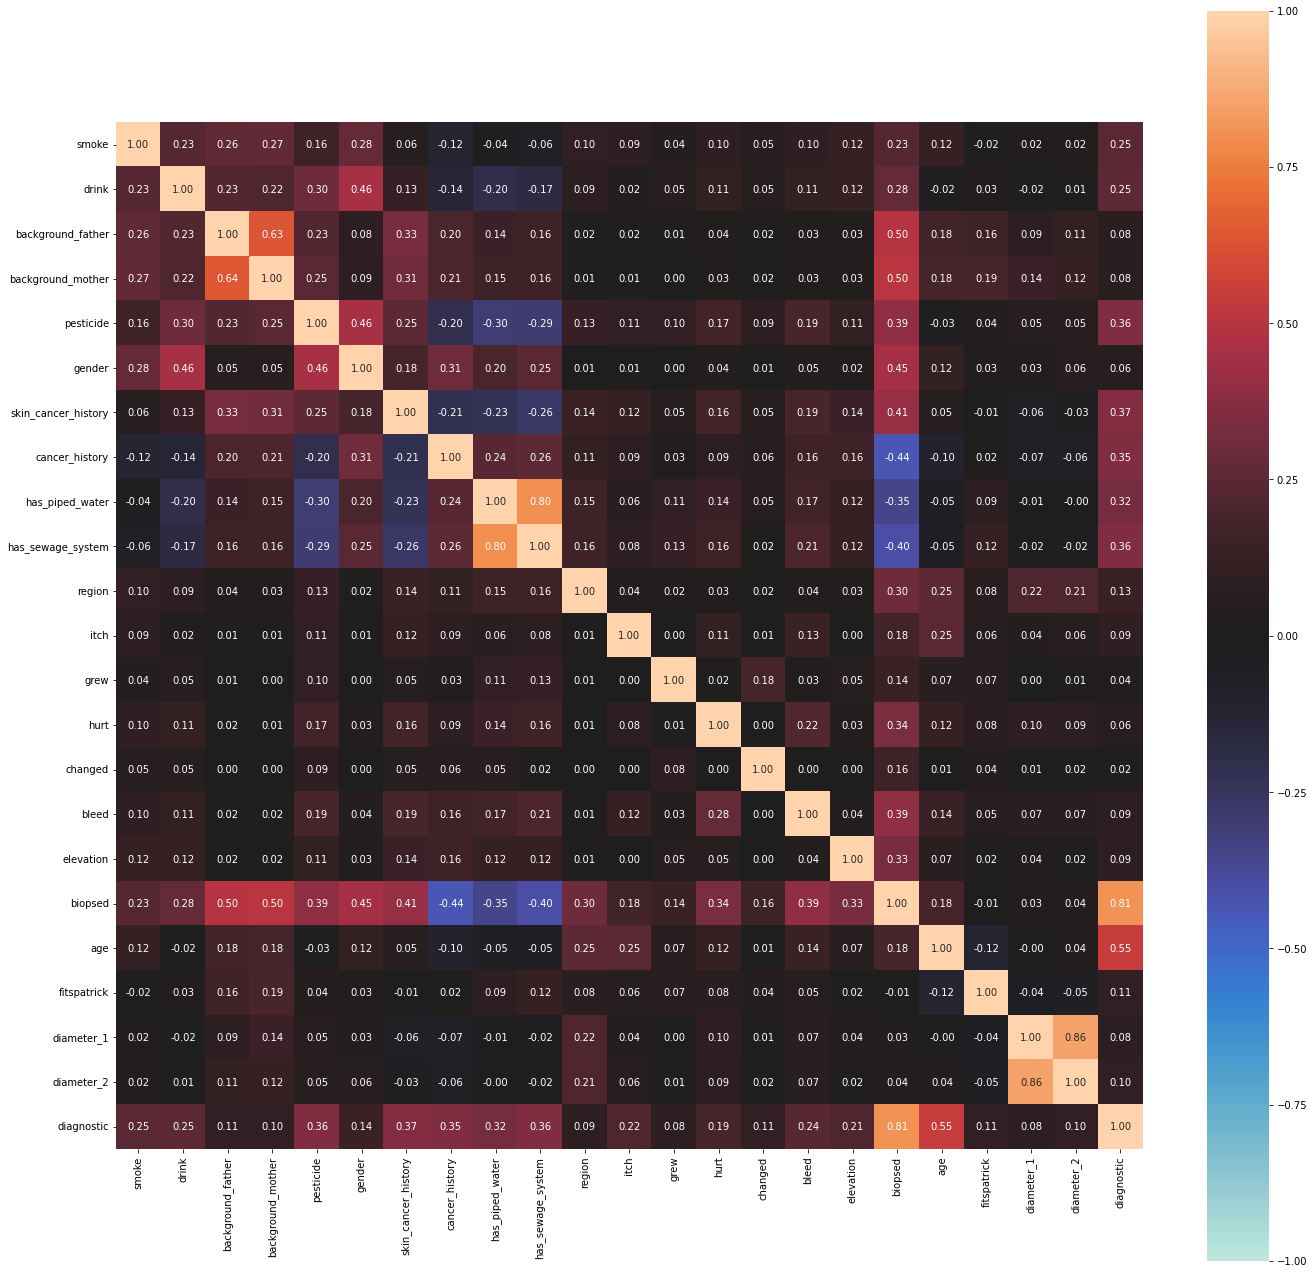

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7d734f3c90>,
 'corr':                         smoke     drink  ...  diameter_2  diagnostic
 smoke                1.000000  0.233215  ...    0.024620    0.248435
 drink                0.233215  1.000000  ...    0.008224    0.253531
 background_father    0.264650  0.226105  ...    0.110310    0.077132
 background_mother    0.270384  0.218597  ...    0.124367    0.075807
 pesticide            0.159537  0.304132  ...    0.047663    0.357281
 gender               0.275741  0.460341  ...    0.061908    0.057554
 skin_cancer_history  0.061045  0.129781  ...   -0.032295    0.365034
 cancer_history      -0.123322 -0.137123  ...   -0.061731    0.352697
 has_piped_water     -0.038437 -0.196497  ...   -0.002929    0.321307
 has_sewage_system   -0.058197 -0.172014  ...   -0.021312    0.355891
 region               0.104501  0.086299  ...    0.212692    0.133337
 itch                 0.088064  0.024568  ...    0.059811    0.094360
 grew           

In [ ]:
#correlation matrix
from dython.nominal import associations
num_cols = len(metaData_le.columns)
associations(metaData_le, nom_nom_assoc='theil', figsize=(num_cols, num_cols))

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2 

sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(x_enc, y_enc)
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (x_enc.columns[i], sf_fit.scores_[i]))

 smoke: 129.364969
 drink: 124.056784
 background_father: 329.449437
 background_mother: 428.725601
 pesticide: 217.131971
 gender: 254.365572
 skin_cancer_history: 215.465226
 cancer_history: 88.942515
 has_piped_water: 58.949159
 has_sewage_system: 82.074732
 region: 105.452255
 itch: 232.712008
 grew: 140.666595
 hurt: 295.562660
 changed: 224.839432
 bleed: 418.616763
 elevation: 234.720572
 biopsed: 623.995996
 age: 3448.582874
 fitspatrick: 71.561837
 diameter_1: 67.381549
 diameter_2: 73.623881


**Stepwise regression is a way to build a model by adding or removing predictor variables, usually via a series of F-tests or T-tests. The variables to be added or removed are chosen based on the test statistics of the estimated coefficients.**

Start the test with no predictor variables (the “Forward” method), adding one at a time as the regression model progresses. If you have a large set of predictor variables, use this method.

In [ ]:
import statsmodels.api as sm

# # Stepwise regression
def get_stats():
    results = sm.OLS(y_enc, x_enc).fit()
    print(results.summary())
get_stats()


# Stepwise regression Foraward and backward

def forward_regression(X, Y,
                       threshold_in
                      ):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded,dtype='float64')
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
    
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            
            print('Included variables  {:30} with p-value {:.6}'.format(best_feature,format( best_pval,'.4f')))

        if not changed:
            break

    return included


forward_regression(X=x_enc,Y=y_enc,threshold_in=0.05)

                                 OLS Regression Results                                
Dep. Variable:             diagnostic   R-squared (uncentered):                   0.585
Model:                            OLS   Adj. R-squared (uncentered):              0.581
Method:                 Least Squares   F-statistic:                              146.0
Date:                Sat, 04 Dec 2021   Prob (F-statistic):                        0.00
Time:                        01:15:38   Log-Likelihood:                         -4167.0
No. Observations:                2298   AIC:                                      8378.
Df Residuals:                    2276   BIC:                                      8504.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

['itch',
 'elevation',
 'biopsed',
 'grew',
 'region',
 'bleed',
 'pesticide',
 'age',
 'has_piped_water']

Start the test with all available predictor variables (the “Backward: method), deleting one variable at a time as the regression model progresses. Use this method if you have a modest number of predictor variables and you want to eliminate a few. 

In [ ]:
metaData_le.columns

Index(['smoke', 'drink', 'background_father', 'background_mother', 'pesticide',
       'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'region', 'itch', 'grew', 'hurt', 'changed',
       'bleed', 'elevation', 'biopsed', 'age', 'fitspatrick', 'diameter_1',
       'diameter_2', 'diagnostic'],
      dtype='object')

In [ ]:

def backward_regression(X, Y,
                           threshold_out
                           ):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        
        if worst_pval > threshold_out:
            #print(worst_pval)
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            print('Removed variable {:30} with p-value {:.6}'.format(worst_feature, format(worst_pval, '.4f')))
        if not changed:
            break
    return included

backward_regression(X=x_enc,Y=y_enc,threshold_out=.05)


Removed variable background_father              with p-value 0.9771
Removed variable diameter_1                     with p-value 0.9771
Removed variable changed                        with p-value 0.7984
Removed variable hurt                           with p-value 0.7197
Removed variable has_sewage_system              with p-value 0.6824
Removed variable gender                         with p-value 0.6869
Removed variable fitspatrick                    with p-value 0.4542
Removed variable background_mother              with p-value 0.3825
Removed variable skin_cancer_history            with p-value 0.3157
Removed variable cancer_history                 with p-value 0.2883
Removed variable smoke                          with p-value 0.1795
Removed variable drink                          with p-value 0.1236
Removed variable diameter_2                     with p-value 0.0823


['pesticide',
 'has_piped_water',
 'region',
 'itch',
 'grew',
 'bleed',
 'elevation',
 'biopsed',
 'age']

**Data preprocessing for Machine Learning**

**The best predictors we will take for model development are: age, biopsed, grew, region, pesticide, skin_cancer_history, cancer_history, background_father, drink, smoke, itch, bleed, changed, has_sewage_system, elevation**

In [ ]:
#dropping all the unwanted columns from the encoded dataframe
#dropping background_mother, gender, has_piped_water, hurt, fitspatrick, diameter1, diameter_2
data_enc=np.delete(data_enc,[3,5,8,13,20,21],axis=1)

In [ ]:
feature_names=['smoke', 'drink', 'background_father', 'pesticide',
        'skin_cancer_history', 'cancer_history',
       'has_sewage_system', 'region', 'itch', 'grew', 'changed',
       'bleed', 'elevation', 'biopsed', 'age','fitspatrick','diagnostic']

In [ ]:
data_enc

array([[ 0.,  0.,  8., ...,  1.,  2.,  3.],
       [ 0.,  0.,  8., ..., 45.,  3.,  1.],
       [ 0.,  0.,  8., ..., 67.,  2.,  0.],
       ...,
       [ 0.,  0.,  8., ..., 64.,  2.,  5.],
       [ 0.,  0.,  8., ..., 48.,  3.,  1.],
       [ 0.,  0.,  8., ..., 31.,  2.,  5.]])

In [ ]:
data_enc.shape

(2298, 17)

In [ ]:
X = data_enc[:, :-1]
Y = data_enc[:, -1]
Target_Names=['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']

**Data normalization using standardScaler**

In [ ]:
# Normalize data
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)
print(scaled)

[[-0.31044169 -0.43666185  0.70639805 ... -1.18480618 -3.13566166
   0.29046167]
 [-0.31044169 -0.43666185  0.70639805 ...  0.8440199  -0.34828433
   1.34660234]
 [-0.31044169 -0.43666185  0.70639805 ... -1.18480618  1.04540434
   0.29046167]
 ...
 [-0.31044169 -0.43666185  0.70639805 ... -1.18480618  0.85535588
   0.29046167]
 [-0.31044169 -0.43666185  0.70639805 ...  0.8440199  -0.15823588
   1.34660234]
 [-0.31044169 -0.43666185  0.70639805 ... -1.18480618 -1.23517712
   0.29046167]]


**Train and test differnet classification algorithms on the Tabular data**

In [ ]:
random_seed=5
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=random_seed)

In [ ]:

from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier 
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error

In [ ]:
sgd_clf = SGDClassifier(random_state=random_seed)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(random_state=5)

In [ ]:
sgd_pred=sgd_clf.predict(X_test)
sgd_score = accuracy_score(Y_test, sgd_pred)
print("Test score: ", sgd_score) 


Test score:  0.6326086956521739


In [ ]:
Y_pred_sgd = sgd_clf.predict(X_test)
y_unique = np.unique(Y_test)
cm = confusion_matrix(Y_test, Y_pred_sgd)
print(cm)
# cm = multilabel_confusion_matrix(Y_test, Y_pred, labels = y_unique)
# cm

[[117  11   0   0   0   0]
 [ 35 147   0   0   2   0]
 [  6   4   0   0   0   0]
 [ 16   4   0  25   0   0]
 [ 20  28   0   0   2   0]
 [ 38   2   0   3   0   0]]


SGDClassifier Score:  63.26086956521739


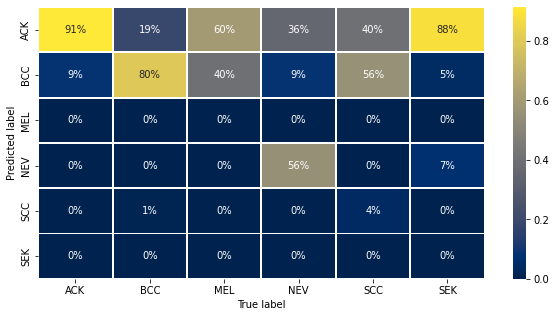

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create the confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_sgd, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")
print("SGDClassifier Score: ", sgd_score*100) 

In [ ]:
cr = classification_report(Y_test, Y_pred_sgd)
print(cr)

              precision    recall  f1-score   support

         0.0       0.50      0.91      0.65       128
         1.0       0.75      0.80      0.77       184
         2.0       0.00      0.00      0.00        10
         3.0       0.89      0.56      0.68        45
         4.0       0.50      0.04      0.07        50
         5.0       0.00      0.00      0.00        43

    accuracy                           0.63       460
   macro avg       0.44      0.38      0.36       460
weighted avg       0.58      0.63      0.57       460



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=random_seed))


In [ ]:
ovo_clf.fit(X_train, Y_train)
ovo_pred=ovo_clf.predict(X_test)

In [ ]:
OVO_score = accuracy_score(Y_test, ovo_pred)
print("Test score: ", OVO_score) 

Test score:  0.6543478260869565


In [ ]:
cr = classification_report(Y_test, ovo_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.54      0.90      0.67       128
         1.0       0.74      0.85      0.79       184
         2.0       0.00      0.00      0.00        10
         3.0       0.85      0.64      0.73        45
         4.0       0.00      0.00      0.00        50
         5.0       0.00      0.00      0.00        43

    accuracy                           0.65       460
   macro avg       0.36      0.40      0.37       460
weighted avg       0.53      0.65      0.58       460



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


OneVsOneClassifier Score: 65.43478260869566


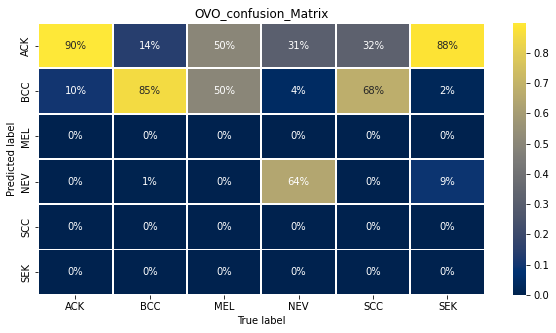

In [ ]:

# Create the confusion matrix
conf_mat = confusion_matrix(Y_test, ovo_pred, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title('OVO_confusion_Matrix')
print('OneVsOneClassifier Score:',OVO_score*100)


In [ ]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=random_seed)
rf_clf = RandomForestClassifier( criterion='entropy', max_depth=50)
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=50)

In [ ]:
Y_pred_rf=rf_clf.predict_proba(X_test)

In [ ]:
rf_testScore=rf_clf.score(X_test,Y_test)
print('rf_testscore is :',rf_testScore)

rf_testscore is : 0.8052173913043478


In [ ]:
Y_pred_rf = np.argmax(Y_pred_rf,axis=1)
# Y_test= np.argmax(Y_test.reshape(1,-1),axis=0)

Random Forest*_testscore is : 80.52173913043478


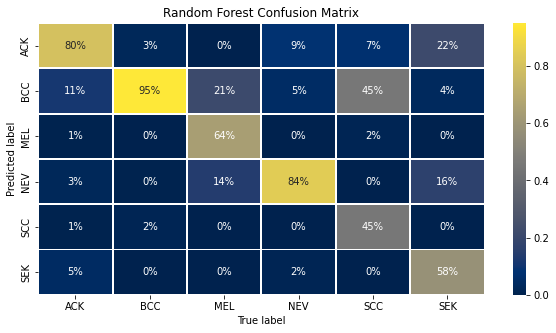

In [ ]:
# Y_pred_rf = np.argmax(Y_pred_rf,axis=1)
# Y_test= np.argmax(Y_test,axis=1)
# Create the confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_rf, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title('Random Forest Confusion Matrix')
print('Random Forest*_testscore is :',(rf_testScore*100))

In [ ]:
# x_enc = pd.DataFrame(data=data_enc[:, :-1], columns=x2.columns) # for all but last column
# y_enc = pd.DataFrame(data=data_enc[:, -1], columns=y2.columns)# for last column

**Identify importand features using Random Forest Feature importance**

In [ ]:
feature_names= pd.DataFrame(data=X, columns=feature_names[:16])

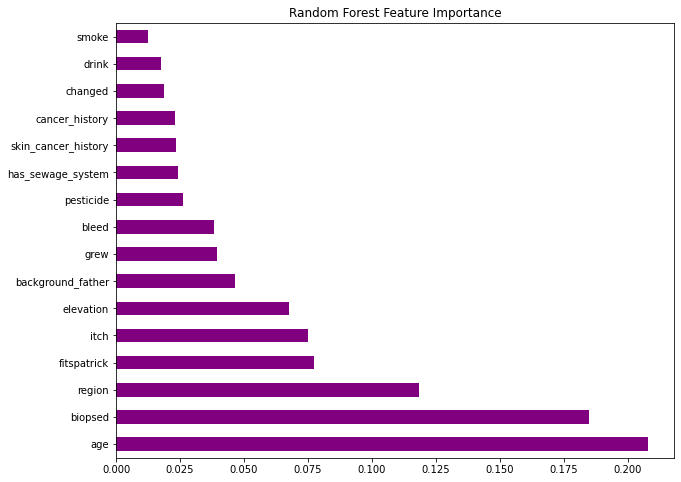

In [ ]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=feature_names.columns)
feat_importances.nlargest(24).plot(kind='barh',title='Random Forest Feature Importance',color='purple',figsize=(10, 8))

In [ ]:
#split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
# decision tree classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
dt_clf = DecisionTreeClassifier(random_state=random_seed,max_depth=50,criterion='entropy')
# fit the model
dt_clf.fit(X_train, Y_train)
pred_dt=dt_clf.predict(X_test)

dt_Testscore=accuracy_score(Y_test,pred_dt)

print('DT test score',dt_Testscore)


DT test score 0.7356521739130435


Decision Tree test score 73.56521739130434


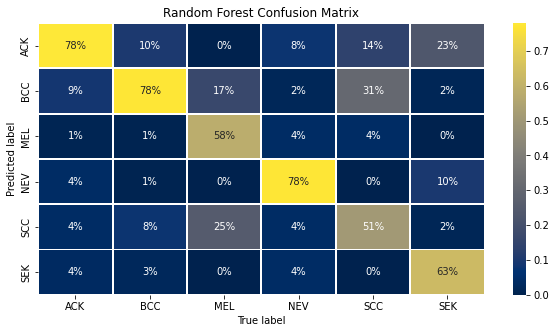

In [ ]:

# Create the confusion matrix
conf_mat = confusion_matrix(Y_test, pred_dt, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")

plt.title('Random Forest Confusion Matrix')
print('Decision Tree test score',dt_Testscore*100)

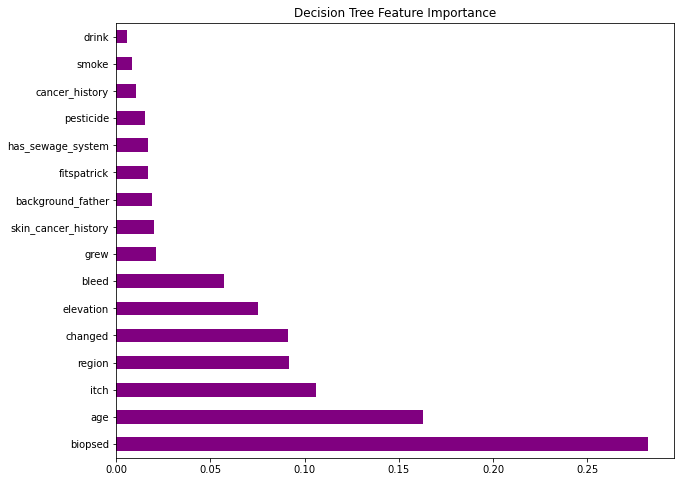

In [ ]:
# get important features for decision tree clasifier
importance = dt_clf.feature_importances_
# summarize feature importance
feature_importances = pd.Series(dt_clf.feature_importances_ , index=feature_names.columns)
feature_importances.nlargest(20).plot(kind='barh',title='Decision Tree Feature Importance',color='purple',figsize=(10, 8))

In [ ]:
feature_cols=['age', 'biopsed', 'grew', 'region', 'pesticide', 'skin_cancer_history', 'cancer_history', 'background_father', 'drink', 'smoke', 'itch', 'bleed', 'has_sewage_system', 'elevation', 'fitspatrick','changed']

In [ ]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(dt_clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = feature_cols,class_names=['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('cancer.png')
# Image(graph.create_png())

In [ ]:
#split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=random_seed)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
# Create a pipeline
nb_clf = make_pipeline(MultinomialNB(alpha=1))

In [ ]:
# Fit the model with training set
nb_clf.fit(X_train, Y_train)
#Predict labels for the test set
labels = nb_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
NB_Score=metrics.accuracy_score(Y_test, labels)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, labels))

Accuracy: 0.6826086956521739


**After fitting the model with the training set and predicting the labels for the test set,then plot the confusion matrix to evaluate the model result and check the percentage of True Vs False predictions.**

Test Accuracy score: 68.26086956521739


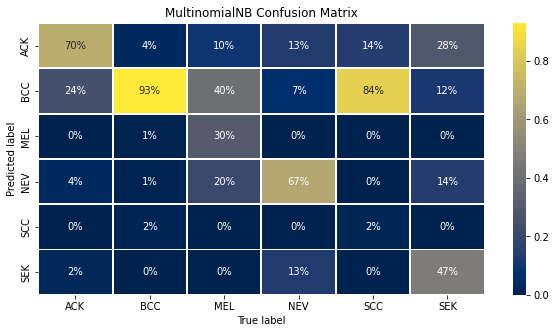

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create the confusion matrix
conf_mat = confusion_matrix(Y_test, labels, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title('MultinomialNB Confusion Matrix')
print('Test Accuracy score:',NB_Score*100)

**Multinomial Logistic Regression**

In [ ]:
lm = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=random_seed)
lm.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial', random_state=5,
                   solver='newton-cg')

In [ ]:
Y_pred=lm.predict(X_test)

In [ ]:
score=lm.score(X_test, Y_test)
print('Test score is:',score)
score=lm.score(X_train,Y_train)
print('Train score is:',score)

Test score is: 0.7217391304347827
Train score is: 0.749727965179543


In [ ]:
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77       128
         1.0       0.69      0.96      0.80       184
         2.0       0.80      0.40      0.53        10
         3.0       0.78      0.69      0.73        45
         4.0       0.00      0.00      0.00        50
         5.0       0.70      0.49      0.58        43

    accuracy                           0.72       460
   macro avg       0.62      0.55      0.57       460
weighted avg       0.65      0.72      0.67       460



Text(69.0, 0.5, 'Predicted label')

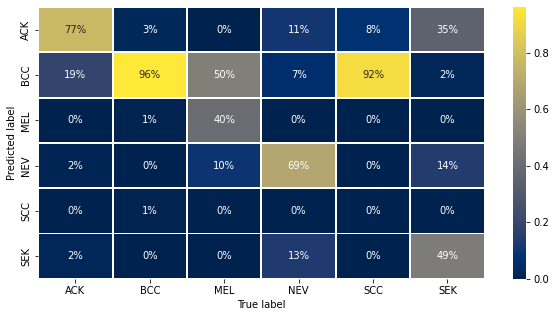

In [ ]:

conf_mat = confusion_matrix(Y_test, Y_pred, normalize="true")
# Plot the confusion matrix
plt.subplots(figsize=(10,5))
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=Target_Names, yticklabels=Target_Names,linewidths=1)
plt.xlabel("True label")
plt.ylabel("Predicted label")